In [1]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer #simulator framework for qiskit
from matplotlib import style
style.use("classic")
%matplotlib inline

In [2]:
nqubits = 7

In [3]:
# apply Hadamard gate to all qubits
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
        
    return qc

Solutions:
|0100100>
|0111100>
|1101100>


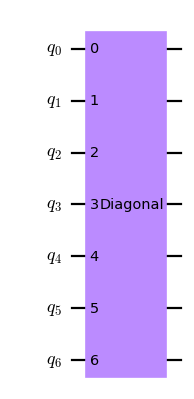

In [4]:
import math
from math import pi
# Oracle circuit

oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')

#theta = pi # theta can be anything (pi chosen arbitrarily)
#oracle.ry(theta/2,1)
#oracle.cx(0,1)
#oracle.ry(-theta/2,1)
#oracle.cx(0,1)


#oracle.h(2)
#oracle.ccx(0,1,2)
#oracle.h(2)

#oracle.ch(0,2)
#oracle.cz(1,2)
#oracle.ch(0,2)

#oracle.ch(0,2)
#oracle.ccx(1,3,2)
#oracle.ch(0,2)

#for qubit in range(nqubits-1):
#    oracle.cz(qubit, nqubits-1)



from qiskit_textbook.problems import grover_problem_oracle
oracle = grover_problem_oracle(nqubits, variant=119, print_solutions = True)


oracle.to_gate()

oracle.draw('mpl')

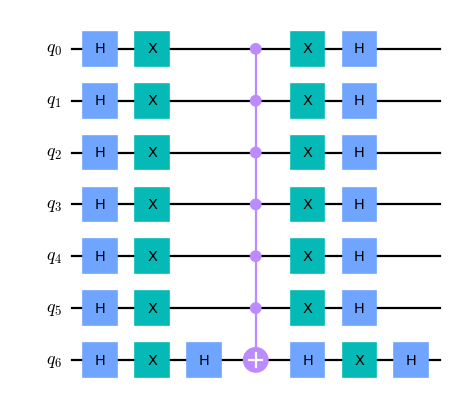

In [5]:
# Diffuser circuit

diffuser = QuantumCircuit(nqubits, name='diffuser$_s$')
for qubit in range(nqubits):
    diffuser.h(qubit)
for qubit in range(nqubits):
    diffuser.x(qubit)
# Do multi-controlled-Z gate
diffuser.h(nqubits-1)
diffuser.mct(list(range(nqubits-1)), nqubits-1)
diffuser.h(nqubits-1)
for qubit in range(nqubits):
    diffuser.x(qubit)
for qubit in range(nqubits):
    diffuser.h(qubit)
diffuser.to_gate()
diffuser.draw('mpl')


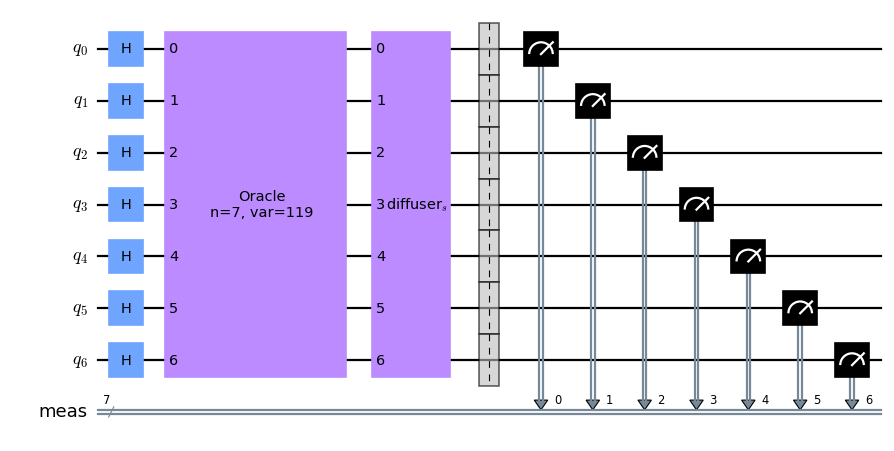

In [6]:
grover_circuit = QuantumCircuit(nqubits)
grover_circuit = initialize_s(grover_circuit, range(nqubits))
grover_circuit.append(oracle, range(nqubits))
grover_circuit.append(diffuser, range(nqubits))
grover_circuit.measure_all()
grover_circuit.draw('mpl')

{'0100100': 51, '0111100': 82, '1101100': 62}


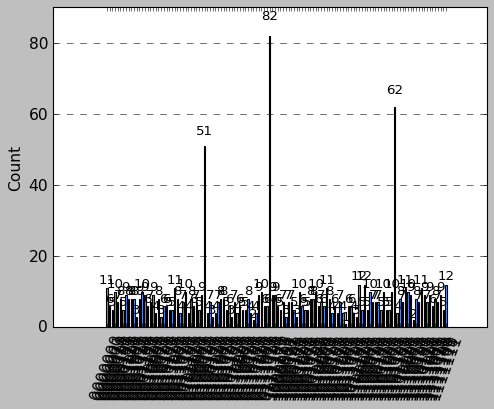

In [7]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend("aer_simulator")

job = q.execute(grover_circuit, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

print(dict((k, v) for k, v in counts.items() if v >= 40))
plot_histogram([counts])

Job ID is chd487go51arsoejunjg
job is being initialized
{'0111100': 0.072265625, '1101100': 0.060546875, '0100100': 0.0595703125}


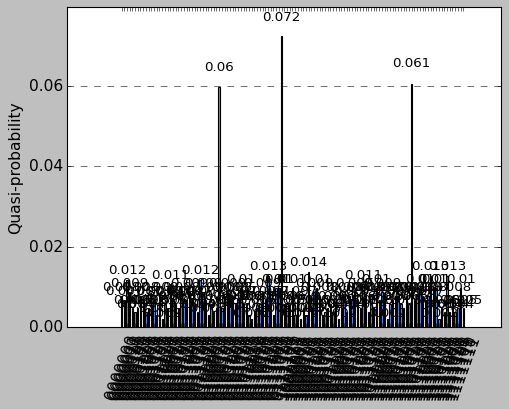

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit.visualization import plot_histogram

QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True)
service = QiskitRuntimeService()

options = Options(optimization_level=1)
options.execution.shots = 1024

with Session(service=service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(circuits=grover_circuit)
    print(f"Job ID is {job.job_id()}")
    print(job._status._value_)
    result = job.result()
binary_prob = result.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob.items() if v >= 0.02))
plot_histogram([binary_prob])